In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [2]:
#load data
file = 'avila_tr'
name = ['intercolumnar distance','upper margin', 'lower margin' ,'exploitation', 'row number', 'modular ratio', 
        'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing','class_name']
dataset = pd.read_csv(file,header=None,names=name,nrows=5000)
dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class_name
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [3]:
#convert class to binary. loc is for labels, iloc is for num positions. Don't know why 'or' doesn't work here (never go to else)
for i in range(len(dataset)):
    if dataset.loc[i,'class_name']=='A':
        dataset.loc[i,'class_name']=0
    elif dataset.loc[i,'class_name']=='B':
        dataset.loc[i,'class_name']=0
    elif dataset.loc[i,'class_name']=='C':
        dataset.loc[i,'class_name']=0
    elif dataset.loc[i,'class_name']=='D':
        dataset.loc[i,'class_name']=0
    elif dataset.loc[i,'class_name']=='E':
        dataset.loc[i,'class_name']=0
    elif dataset.loc[i,'class_name']=='F':
        dataset.loc[i,'class_name']=0
    else:
        dataset.loc[i,'class_name']=1

In [4]:
#for i in range(100):
#    if dataset.iloc[i,-1] == 'F':
#        print(1)
#    else:
#        print(0)
#dataset.iloc[8,-1]
#dataset

In [35]:
dataset.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class_name
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.008436,-0.000141,-0.011080,-0.008942,0.004309,0.006974,-0.016204,0.021178,0.004698,-0.009218,0.254000
std,1.031202,1.041746,1.029763,1.021334,1.003216,1.000895,1.100042,1.015597,1.020528,1.037241,0.435341
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.423855,-6.719324,0.000000
25%,-0.128929,-0.267686,0.064919,-0.542563,0.172340,-0.640182,-0.044076,-0.531138,-0.372457,-0.534172,0.000000
50%,0.043885,-0.063555,0.214288,0.087408,0.261718,-0.058835,0.220177,0.118598,0.064084,-0.045447,0.000000
75%,0.204355,0.203385,0.352988,0.656285,0.261718,0.564038,0.446679,0.662744,0.500624,0.547258,1.000000
max,11.819916,19.470188,7.458681,3.987152,1.066121,4.882622,10.714792,3.817748,3.244594,4.281308,1.000000


In [36]:
print(dataset.groupby('class_name').size())

class_name
0    3730
1    1270
dtype: int64


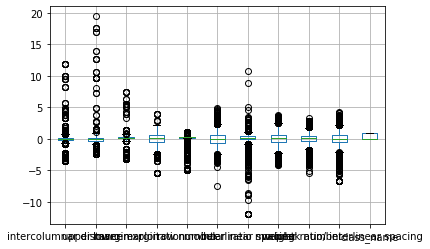

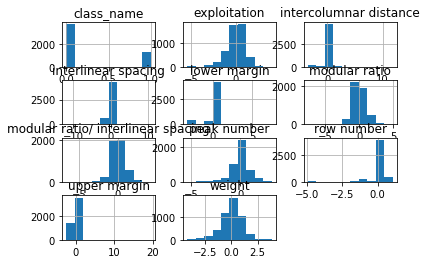

In [37]:
dataset.boxplot()
dataset.hist()
plt.show()

In [51]:
#rerun
#split data
array = dataset.values
np.random.shuffle(array)
X = array[:,:-1]
Y = array[:,-1]
seed = 7
#np.random.seed(seed)
X_train_one,X_test_one,Y_train_one,Y_test_one = model_selection.train_test_split(X,Y,test_size=0.2)
X_train_two,X_test_two,Y_train_two,Y_test_two = model_selection.train_test_split(X,Y,test_size=0.5)
X_train_three,X_test_three,Y_train_three,Y_test_three = model_selection.train_test_split(X,Y,test_size=0.8)

#standardize
scaler_one = StandardScaler().fit(X_train_one)
rescaled_X_train_one = scaler_one.transform(X_train_one)

scaler_two = StandardScaler().fit(X_train_two)
rescaled_X_train_two = scaler_two.transform(X_train_two)

scaler_three = StandardScaler().fit(X_train_three)
rescaled_X_train_three = scaler_three.transform(X_train_three)

print(rescaled_X_train_one.shape,Y_train_one.shape)
print(rescaled_X_train_two.shape,Y_train_two.shape)
print(rescaled_X_train_three.shape,Y_train_three.shape)

partition = []
partition.append((rescaled_X_train_one,Y_train_one,'test size 0.2'))
partition.append((rescaled_X_train_two,Y_train_two, 'test size 0.5'))
partition.append((rescaled_X_train_three,Y_train_three, 'test size 0.8'))
print(partition[0][1])

valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

(4000, 10) (4000,)
(2500, 10) (2500,)
(1000, 10) (1000,)
[0. 1. 0. ... 0. 0. 0.]
((1000, 10), (1000,))


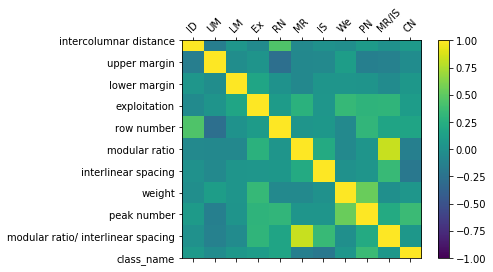

In [5]:
#correlation matrix
fig,ax = plt.subplots()
cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,11,1)
#label = ['age','fnlwgt''capital_gain','capital_loss','hours_per_week']
ax.set_xticks(ticks)
ax.set_yticks(ticks)
x_label = ['ID','UM','LM','Ex','RN','MR','IS','We','PN','MR/IS','CN']
ax.set_xticklabels(x_label)
ax.set_yticklabels(name)
plt.xticks(rotation=45)
#plt.yticks(rotation=45)
plt.show()

In [76]:
#try out models. Hard to rerun after reopening due to slowness
estimators = []
estimators.append(('bagging',BaggingClassifier()))
#estimators.append(('neural',MLPClassifier()))
estimators.append(('XGB',xgb.XGBClassifier()))
#estimators.append(('LR',LogisticRegression()))
estimators.append(('CART',DecisionTreeClassifier()))
estimators.append(('SVM',SVC()))
estimators.append(('KNN',KNeighborsClassifier()))
#estimators.append(('LDA',LinearDiscriminantAnalysis()))
estimators.append(('NB',GaussianNB()))
estimators.append(('Ada',AdaBoostClassifier()))
estimators.append(('Grad',GradientBoostingClassifier()))
estimators.append(('Ran',RandomForestClassifier()))
#estimators.append(('Extra',ExtraTreesClassifier()))
#ready = Pipeline(estimators)
results = []
results_name=[]
results_testsize = []
#results_nonscaled=[]
for name, model in estimators:
    for train in partition:
        kfold = model_selection.KFold(n_splits = 10,random_state=seed)
        result = model_selection.cross_val_score(model, train[0],train[1],cv=kfold,scoring='accuracy')
        #result_nonscaled = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
        results.append(result)
        #results_nonscaled.append(result_nonscaled)
        results_name.append(name)
        results_testsize.append(train[2])
        print("%s %s %f %f" % (name,train[2],result.mean(),result.std()))

bagging test size 0.2 0.977709 0.002576
bagging test size 0.5 0.962993 0.008441
bagging test size 0.8 0.933852 0.012789
XGB test size 0.2 0.934086 0.008190
XGB test size 0.5 0.930970 0.011333
XGB test size 0.8 0.926166 0.014142
CART test size 0.2 0.968119 0.008620
CART test size 0.5 0.953981 0.011939
CART test size 0.8 0.918046 0.019030


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.2 0.902086 0.008882


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.5 0.896648 0.011922


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.8 0.905065 0.017508
KNN test size 0.2 0.906520 0.006622
KNN test size 0.5 0.891082 0.011928
KNN test size 0.8 0.893564 0.012221
NB test size 0.2 0.438372 0.124718
NB test size 0.5 0.410118 0.138550
NB test size 0.8 0.821660 0.019229
Ada test size 0.2 0.905919 0.007288
Ada test size 0.5 0.905274 0.013555
Ada test size 0.8 0.896927 0.013304
Grad test size 0.2 0.934205 0.007489
Grad test size 0.5 0.935379 0.011693
Grad test size 0.8 0.925699 0.011759


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.2 0.970878 0.005994


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.5 0.954936 0.008640


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.8 0.930953 0.011869


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


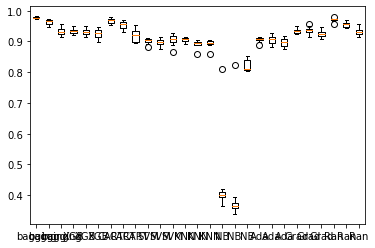

In [77]:
fig,ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(results_name+results_testsize)
plt.show()

#bagging is the best model here with accuracy of 0.977709 and test size of 0.2
#tuning param for bagging
base_estimator=[DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
#max_samples = [0.1,0.5,1.0,1.5]
#max_features=[0.5,1,1.5]
n_estimators=[5,10,20,100]
param_grid = dict(base_estimator=base_estimator,n_estimators=n_estimators)
model_tuning = BaggingClassifier()
grid = GridSearchCV(model_tuning,param_grid,scoring='accuracy',cv=kfold)
grid_result = grid.fit(rescaled_X_train_one, Y_train_one)
#print(grid_result.grid_scores_)
print(grid_result.best_params_,grid_result.best_score_)
#the fan spins crazy so I might wanna do this on another machine

For j in three types of different partitions For t in three different trials/repeats For t in three different trials/repeats (random splits for each type j, 20/80,50/50,80/20) cross validate find the optimal hyper-parameter train using the hyper-parameter above obtain the training and validation accuracy/error test obtain the testing accuracy compute the averaged accuracy (training, validation, and testing) for each classifier c out of three trials rank order the classifiers

In [29]:
#select a few models from the class list: xgboost, svm, randomforest,decision tree, KNN, Logistic regression
#lists of hyperparameters to try out for each model


#SVM:
svm = {'C': [0.1,1,10,100,1000]}#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1,1,10,100,1000]}

#Xgboost
xgboost = {'max_depth': [1,3,5,7,10],'gamma': [0.01,0.1,0.5,1,2]}#'reg_alpha': [0, 0.5, 1],'reg_lambda': [1, 2,3],'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
       #'learning_rate': [0.01,0.05,0.1,0.2],#'min_child_weight': [1,3,5],
       #,'max_features': ['auto','log2','sqrt'],'subsample': [0.1,0.5,0.75,1],
       #'n_estimators': [100, 250, 500, 1000]}

#random forest
RF = {'max_depth': [10,50,100]}
      #'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]} #'n_estimators': [10,100,1000],'max_features': ['auto','log2','sqrt'],

#DecisionTree
DT = {'max_depth': [None,4,8,12]}#'criterion': ['gini', 'entropy'],'splitter': ['best','random'],'max_depth': [None,4,8,12],
      #'min_samples_split': [2,5,10],'min_samples_leaf':[1,2,4],'max_features': ['auto','log2','sqrt']}

#KNN
KNN = {'n_neighbors':[1,5,10]}#, 'weights':['uniform','distance']}#,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

#logistic regression
LR = {'C':[0.01,0.1,1,10,100,1000]}

estimators = []
estimators.append(('xgb',xgboost,xgb.XGBClassifier()))
estimators.append(('LR',LR,LogisticRegression()))
estimators.append(('DT',DT,DecisionTreeClassifier()))
estimators.append(('SVM',svm,SVC()))
estimators.append(('KNN',KNN,KNeighborsClassifier()))
estimators.append(('RF',RF,RandomForestClassifier()))
results = []
results_name=[]
results_testsize = []

In [30]:
validation=[] #only run once

In [53]:
#rerun
for train in partition:
    #for i in range(3):
    for name,param_grid,model in estimators:
        kfold = model_selection.KFold(n_splits = 5)
        grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",cv = kfold, return_train_score=True)
        grid_result = grid.fit(train[0],train[1])
        results.append((grid_result,grid_result.best_params_,grid_result.best_score_))
        results_name.append(name)
        results_testsize.append(train[2])
        print(name,grid_result.best_params_,grid_result.best_score_,train[2])
        validation.append((name,grid_result.best_score_,train[2]))

xgb {'gamma': 0.01, 'max_depth': 10} 0.972 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 0.1} 0.85925 test size 0.2
DT {'max_depth': None} 0.93925 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 100} 0.91475 test size 0.2
KNN {'n_neighbors': 5} 0.898 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 100} 0.94925 test size 0.2
xgb {'gamma': 0.5, 'max_depth': 10} 0.958 test size 0.5
LR {'C': 100} 0.8604 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

DT {'max_depth': None} 0.9272 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.9076 test size 0.5
KNN {'n_neighbors': 1} 0.8888 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 50} 0.9316 test size 0.5
xgb {'gamma': 0.1, 'max_depth': 7} 0.921 test size 0.8
LR {'C': 10} 0.85 test size 0.8
DT {'max_depth': 8} 0.885 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.882 test size 0.8
KNN {'n_neighbors': 5} 0.855 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 50} 0.895 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
xgb {'gamma': 0.01, 'max_depth': 10} 0.972 test size 0.2
LR {'C': 0.1} 0.85925 test size 0.2
DT {'max_depth': None} 0.93925 test size 0.2
SVM {'C': 100} 0.91475 test size 0.2
KNN {'n_neighbors': 5} 0.898 test size 0.2
RF {'max_depth': 100} 0.94925 test size 0.2

xgb {'gamma': 0.5, 'max_depth': 10} 0.958 test size 0.5
LR {'C': 100} 0.8604 test size 0.5
DT {'max_depth': None} 0.9272 test size 0.5
SVM {'C': 10} 0.9076 test size 0.5
KNN {'n_neighbors': 1} 0.8888 test size 0.5
RF {'max_depth': 50} 0.9316 test size 0.5

xgb {'gamma': 0.1, 'max_depth': 7} 0.921 test size 0.8
LR {'C': 10} 0.85 test size 0.8
DT {'max_depth': 8} 0.885 test size 0.8
SVM {'C': 10} 0.882 test size 0.8
KNN {'n_neighbors': 5} 0.855 test size 0.8
RF {'max_depth': 50} 0.895 test size 0.8

In [54]:
validation #rerun

[('xgb', 0.974, 'test size 0.2'),
 ('LR', 0.861, 'test size 0.2'),
 ('DT', 0.94225, 'test size 0.2'),
 ('SVM', 0.91725, 'test size 0.2'),
 ('KNN', 0.88575, 'test size 0.2'),
 ('RF', 0.949, 'test size 0.2'),
 ('xgb', 0.9576, 'test size 0.5'),
 ('LR', 0.8564, 'test size 0.5'),
 ('DT', 0.9236, 'test size 0.5'),
 ('SVM', 0.9108, 'test size 0.5'),
 ('KNN', 0.8832, 'test size 0.5'),
 ('RF', 0.9324, 'test size 0.5'),
 ('xgb', 0.934, 'test size 0.8'),
 ('LR', 0.867, 'test size 0.8'),
 ('DT', 0.902, 'test size 0.8'),
 ('SVM', 0.894, 'test size 0.8'),
 ('KNN', 0.883, 'test size 0.8'),
 ('RF', 0.914, 'test size 0.8'),
 ('xgb', 0.97, 'test size 0.2'),
 ('LR', 0.865, 'test size 0.2'),
 ('DT', 0.94825, 'test size 0.2'),
 ('SVM', 0.9175, 'test size 0.2'),
 ('KNN', 0.898, 'test size 0.2'),
 ('RF', 0.9445, 'test size 0.2'),
 ('xgb', 0.9584, 'test size 0.5'),
 ('LR', 0.8592, 'test size 0.5'),
 ('DT', 0.92, 'test size 0.5'),
 ('SVM', 0.9044, 'test size 0.5'),
 ('KNN', 0.88, 'test size 0.5'),
 ('RF', 0.93

In [ ]:
#val_acc_list=[]
#for i in range(6):
#    for j in range(3):
#        val_acc_process = (validation[i][1]+validation[i+][1]+validation[i+12][1])/3
 #       val_acc_list.append(val_acc_process)

In [41]:
#cross validate with different hyperparams
#for train in partition:
#    for i in range(3):
#        for name,param_grid,model in estimators:
##            kfold = model_selection.KFold(n_splits = 5)
 #           grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",cv = kfold)
 #           grid_result = grid.fit(train[0],train[1])
  #          results.append((grid_result, grid_result.best_params_,grid_result.best_score_))
   #         results_name.append(name)
    #        results_testsize.append(train[2])
     #       print(name,grid_result.best_params_,grid_result.best_score_,train[2])

xgb {'gamma': 0.01, 'max_depth': 10} 0.975 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 1} 0.8655 test size 0.2
DT {'max_depth': None} 0.9405 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.92025 test size 0.2
KNN {'n_neighbors': 5} 0.8905 test size 0.2
RF {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 1000} 0.96075 test size 0.2
xgb {'gamma': 0.01, 'max_depth': 10} 0.975 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 1} 0.8655 test size 0.2
DT {'max_depth': None} 0.93875 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.92025 test size 0.2
KNN {'n_neighbors': 5} 0.8905 test size 0.2
RF {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 1000} 0.96125 test size 0.2
xgb {'gamma': 0.01, 'max_depth': 10} 0.975 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 1} 0.8655 test size 0.2
DT {'max_depth': None} 0.942 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.92025 test size 0.2
KNN {'n_neighbors': 5} 0.8905 test size 0.2
RF {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 1000} 0.961 test size 0.2
xgb {'gamma': 0.01, 'max_depth': 10} 0.954 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 100} 0.8524 test size 0.5
DT {'max_depth': 12} 0.922 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.9008 test size 0.5
KNN {'n_neighbors': 5} 0.8788 test size 0.5
RF {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000} 0.9424 test size 0.5
xgb {'gamma': 0.01, 'max_depth': 10} 0.954 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 100} 0.8524 test size 0.5
DT {'max_depth': 12} 0.9212 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.9008 test size 0.5
KNN {'n_neighbors': 5} 0.8788 test size 0.5
RF {'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100} 0.9444 test size 0.5
xgb {'gamma': 0.01, 'max_depth': 10} 0.954 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 100} 0.8524 test size 0.5
DT {'max_depth': 12} 0.9204 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1000} 0.9008 test size 0.5
KNN {'n_neighbors': 5} 0.8788 test size 0.5
RF {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100} 0.9452 test size 0.5
xgb {'gamma': 0.5, 'max_depth': 7} 0.922 test size 0.8
LR {'C': 0.1} 0.864 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

DT {'max_depth': 4} 0.877 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.89 test size 0.8
KNN {'n_neighbors': 5} 0.867 test size 0.8
RF {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000} 0.915 test size 0.8
xgb {'gamma': 0.5, 'max_depth': 7} 0.922 test size 0.8
LR {'C': 0.1} 0.864 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

DT {'max_depth': 4} 0.877 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.89 test size 0.8
KNN {'n_neighbors': 5} 0.867 test size 0.8
RF {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 1000} 0.915 test size 0.8
xgb {'gamma': 0.5, 'max_depth': 7} 0.922 test size 0.8
LR {'C': 0.1} 0.864 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

DT {'max_depth': 4} 0.877 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.89 test size 0.8
KNN {'n_neighbors': 5} 0.867 test size 0.8
RF {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000} 0.916 test size 0.8


Results:

xgb {'gamma': 0.1, 'max_depth': 10} 0.97325 test size 0.2
LR {'C': 0.1} 0.86075 test size 0.2
DT {'max_depth': None} 0.93975 test size 0.2
SVM {'C': 100} 0.92275 test size 0.2
KNN {'n_neighbors': 5} 0.89375 test size 0.2
RF {'max_depth': 50} 0.94875 test size 0.2

xgb {'gamma': 0.1, 'max_depth': 10} 0.97325 test size 0.2
LR {'C': 0.1} 0.86075 test size 0.2
DT {'max_depth': None} 0.939 test size 0.2
SVM {'C': 100} 0.92275 test size 0.2
KNN {'n_neighbors': 5} 0.89375 test size 0.2
RF {'max_depth': 100} 0.94725 test size 0.2

xgb {'gamma': 0.1, 'max_depth': 10} 0.97325 test size 0.2
LR {'C': 0.1} 0.86075 test size 0.2
DT {'max_depth': None} 0.938 test size 0.2
SVM {'C': 100} 0.92275 test size 0.2
KNN {'n_neighbors': 5} 0.89375 test size 0.2
RF {'max_depth': 50} 0.9485 test size 0.2

In [36]:
final_result_p1=[]
final_result_p2=[]
final_result_p3=[]


In [55]:
#rerun
temp=[]
best_xgb=[]
best_LR=[]
best_DT=[]
best_SVM=[]
best_KNN=[]
best_RF=[]

LR {'C': 0.1} 0.8564 test size 0.5
DT {'max_depth': None} 0.9236 test size 0.5
SVM {'C': 10} 0.9108 test size 0.5
KNN {'n_neighbors': 1} 0.8832 test size 0.5
RF {'max_depth': 50} 0.9324 test size 0.5
xgb {'gamma': 0.01, 'max_depth': 7} 0.934 test size 0.8
LR {'C': 1} 0.867 test size 0.8
DT {'max_depth': 12} 0.902 test size 0.8
SVM {'C': 10} 0.894 test size 0.8
KNN {'n_neighbors': 5} 0.883 test size 0.8
RF {'max_depth': 100} 0.914 test size 0.8

xgb {'gamma': 0.5, 'max_depth': 10} 0.97 test size 0.2
LR {'C': 10} 0.865 test size 0.2
DT {'max_depth': None} 0.94825 test size 0.2
SVM {'C': 100} 0.9175 test size 0.2
KNN {'n_neighbors': 5} 0.898 test size 0.2
RF {'max_depth': 50} 0.9445 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 7} 0.9584 test size 0.5
LR {'C': 10} 0.8592 test size 0.5
DT {'max_depth': 12} 0.92 test size 0.5
SVM {'C': 1000} 0.9044 test size 0.5
KNN {'n_neighbors': 5} 0.88 test size 0.5
RF {'max_depth': 100} 0.9344 test size 0.5

xgb {'gamma': 0.5, 'max_depth': 5} 0.928 test size 0.8
LR {'C': 100} 0.868 test size 0.8
DT {'max_depth': 8} 0.895 test size 0.8
SVM {'C': 10} 0.904 test size 0.8
KNN {'n_neighbors': 5} 0.887 test size 0.8
RF {'max_depth': 10} 0.923 test size 0.8

In [56]:
#rerun
best_xgb.append(xgb.XGBClassifier(gamma = 0.01,max_depth=10))
best_xgb.append(xgb.XGBClassifier(gamma = 0.5,max_depth=10))
best_xgb.append(xgb.XGBClassifier(gamma = 0.1,max_depth=7))
temp=[]
count=0
for train in partition:        
    best_fit = best_xgb[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1

final_result_p1.append(('xgb',temp[0][0],validation[0][1],temp[0][1]))
final_result_p2.append(('xgb',temp[1][0],validation[6][1],temp[1][1]))
final_result_p3.append(('xgb',temp[2][0],validation[12][1],temp[2][1]))

best_LR.append(LogisticRegression(C=0.1))
best_LR.append(LogisticRegression(C=100))
best_LR.append(LogisticRegression(C=10))
count=0
temp = []
for train in partition:        
    best_fit = best_LR[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('LR',temp[0][0],validation[1][1],temp[0][1]))
final_result_p2.append(('LR',temp[1][0],validation[7][1],temp[1][1]))
final_result_p3.append(('LR',temp[2][0],validation[13][1],temp[2][1]))


best_DT.append(DecisionTreeClassifier(max_depth=None))
best_DT.append(DecisionTreeClassifier(max_depth=None))
best_DT.append(DecisionTreeClassifier(max_depth=8))
count=0
temp = []
for train in partition:        
    best_fit = best_DT[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('DT',temp[0][0],validation[2][1],temp[0][1]))
final_result_p2.append(('DT',temp[1][0],validation[8][1],temp[1][1]))
final_result_p3.append(('DT',temp[2][0],validation[14][1],temp[2][1]))

best_SVM.append(SVC(C=100))
best_SVM.append(SVC(C=10))
best_SVM.append(SVC(C=10))
count=0
temp = []
for train in partition:        
    best_fit = best_SVM[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('SVM',temp[0][0],validation[3][1],temp[0][1]))
final_result_p2.append(('SVM',temp[1][0],validation[9][1],temp[1][1]))
final_result_p3.append(('SVM',temp[2][0],validation[15][1],temp[2][1]))

best_KNN.append(KNeighborsClassifier(n_neighbors=5))
best_KNN.append(KNeighborsClassifier(n_neighbors=1))
best_KNN.append(KNeighborsClassifier(n_neighbors=5))
count=0
temp = []
for train in partition:        
    best_fit = best_KNN[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('KNN',temp[0][0],validation[4][1],temp[0][1]))
final_result_p2.append(('KNN',temp[1][0],validation[10][1],temp[1][1]))
final_result_p3.append(('KNN',temp[2][0],validation[16][1],temp[2][1]))

best_RF.append(RandomForestClassifier(max_depth=100))
best_RF.append(RandomForestClassifier(max_depth=50))
best_RF.append(RandomForestClassifier(max_depth=50))
count=0
temp = []
for train in partition:        
    best_fit = best_RF[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('RF',temp[0][0],validation[5][1],temp[0][1]))
final_result_p2.append(('RF',temp[1][0],validation[11][1],temp[1][1]))
final_result_p3.append(('RF',temp[2][0],validation[17][1],temp[2][1]))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\si

In [62]:
final_result_p2

[('xgb', 1.0, 0.9576, 0.9596),
 ('LR', 0.8592, 0.8564, 0.86),
 ('DT', 1.0, 0.9236, 0.94),
 ('SVM', 0.9352, 0.9108, 0.9024),
 ('KNN', 1.0, 0.8832, 0.874),
 ('RF', 0.994, 0.9324, 0.9244),
 ('xgb', 1.0, 0.9576, 0.9648),
 ('LR', 0.86, 0.8564, 0.868),
 ('DT', 0.992, 0.9236, 0.9192),
 ('SVM', 0.9728, 0.9108, 0.9024),
 ('KNN', 0.9264, 0.8832, 0.9),
 ('RF', 0.998, 0.9324, 0.938),
 ('xgb', 1.0, 0.9576, 0.9628),
 ('LR', 0.8608, 0.8564, 0.8644),
 ('DT', 1.0, 0.9236, 0.9344),
 ('SVM', 0.9352, 0.9108, 0.9048),
 ('KNN', 1.0, 0.8832, 0.8772),
 ('RF', 0.9948, 0.9324, 0.9412)]

In [63]:
#xgb_train_acc = (final_result_p1[0][1]+final_result_p1[6][1]+final_result_p1[12][1])/3
#xgb_train_std = np.std(np.array([final_result_p1[0][1],final_result_p1[6][1],final_result_p1[12][1]]))
#xgb_val_acc = (final_result_p1[0][2]+final_result_p1[6][2]+final_result_p1[12][2])/3
#xgb_val_std = np.std(np.array([final_result_p1[0][2],final_result_p1[6][2],final_result_p1[12][2]]))
#xgb_test_acc = (final_result_p1[0][3]+final_result_p1[6][3]+final_result_p1[12][3])/3
#xgb_test_std = np.std(np.array([final_result_p1[0][3],final_result_p1[6][3],final_result_p1[12][3]]))

train_acc_p1=[]
val_acc_p1=[]
test_acc_p1=[]
for i in range(6):
    train_acc_p1.append(((final_result_p1[i][1]+final_result_p1[i+6][1]+final_result_p1[i+12][1])/3,
                        np.std(np.array([final_result_p1[i][1],final_result_p1[i+6][1],final_result_p1[i+12][1]]))))
    val_acc_p1.append(((final_result_p1[i][2]+final_result_p1[i+6][2]+final_result_p1[i+12][2])/3,
                     np.std(np.array([final_result_p1[i][2],final_result_p1[i+6][2],final_result_p1[i+12][2]]))))
    test_acc_p1.append(((final_result_p1[i][3]+final_result_p1[i+6][3]+final_result_p1[i+12][3])/3,
                      np.std(np.array([final_result_p1[i][3],final_result_p1[i+6][3],final_result_p1[i+12][3]]))))
train_acc_p2=[]
val_acc_p2=[]
test_acc_p2=[]    
for i in range(6):
    train_acc_p2.append(((final_result_p2[i][1]+final_result_p2[i+6][1]+final_result_p2[i+12][1])/3,
                        np.std(np.array([final_result_p2[i][1],final_result_p2[i+6][1],final_result_p2[i+12][1]]))))
    val_acc_p2.append(((final_result_p2[i][2]+final_result_p2[i+6][2]+final_result_p2[i+12][2])/3,
                     np.std(np.array([final_result_p2[i][2],final_result_p2[i+6][2],final_result_p2[i+12][2]]))))
    test_acc_p2.append(((final_result_p2[i][3]+final_result_p2[i+6][3]+final_result_p2[i+12][3])/3,
                      np.std(np.array([final_result_p2[i][3],final_result_p2[i+6][3],final_result_p2[i+12][3]]))))
    
train_acc_p3=[]
val_acc_p3=[]
test_acc_p3=[]    
for i in range(6):
    train_acc_p3.append(((final_result_p3[i][1]+final_result_p3[i+6][1]+final_result_p3[i+12][1])/3,
                        np.std(np.array([final_result_p3[i][1],final_result_p3[i+6][1],final_result_p3[i+12][1]]))))
    val_acc_p3.append(((final_result_p3[i][2]+final_result_p3[i+6][2]+final_result_p3[i+12][2])/3,
                     np.std(np.array([final_result_p3[i][2],final_result_p3[i+6][2],final_result_p3[i+12][2]]))))
    test_acc_p3.append(((final_result_p3[i][3]+final_result_p3[i+6][3]+final_result_p3[i+12][3])/3,
                      np.std(np.array([final_result_p3[i][3],final_result_p3[i+6][3],final_result_p3[i+12][3]]))))


In [65]:
print(train_acc_p1)
print(val_acc_p1)
print(test_acc_p1)
print(train_acc_p2)
print(val_acc_p2)
print(test_acc_p2)
print(train_acc_p3)
print(val_acc_p3)
print(test_acc_p3)


[(1.0, 0.0), (0.86275, 0.002131118642090741), (1.0, 0.0), (0.9608333333333333, 0.0075672907231643), (0.93375, 0.0015411035007422604), (0.9980833333333333, 0.0008249579113843044)]
[(0.9739999999999999, 1.1102230246251565e-16), (0.8610000000000001, 1.1102230246251565e-16), (0.94225, 0.0), (0.91725, 0.0), (0.8857500000000001, 1.1102230246251565e-16), (0.949, 0.0)]
[(0.9776666666666666, 0.0020548046676563273), (0.868, 0.007788880963698622), (0.9496666666666668, 0.008730533902472538), (0.924, 0.00509901951359279), (0.906, 0.015748015748023637), (0.9579999999999999, 0.004242640687119289)]
[(1.0, 0.0), (0.86, 0.0006531972647421995), (0.9973333333333333, 0.0037712361663282566), (0.9477333333333333, 0.017724809981742775), (0.9754666666666667, 0.034695372730219935), (0.9956, 0.0017281975195754275)]
[(0.9575999999999999, 1.1102230246251565e-16), (0.8564000000000002, 1.1102230246251565e-16), (0.9236, 0.0), (0.9108, 0.0), (0.8832, 0.0), (0.9324, 0.0)]
[(0.9624, 0.0021416504538945267), (0.8641333333

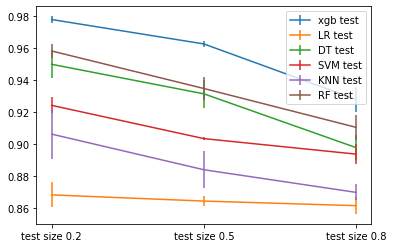

In [87]:
fig = plt.figure()

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[0][0],test_acc_p2[0][0],test_acc_p3[0][0]]
             , yerr=[test_acc_p1[0][1],test_acc_p2[0][1],test_acc_p3[0][1]],label='xgb test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[1][0],test_acc_p2[1][0],test_acc_p3[1][0]]
             , yerr=[test_acc_p1[1][1],test_acc_p2[1][1],test_acc_p3[1][1]],label='LR test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[2][0],test_acc_p2[2][0],test_acc_p3[2][0]]
             , yerr=[test_acc_p1[2][1],test_acc_p2[2][1],test_acc_p3[2][1]],label='DT test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[3][0],test_acc_p2[3][0],test_acc_p3[3][0]]
             , yerr=[test_acc_p1[3][1],test_acc_p2[3][1],test_acc_p3[3][1]],label='SVM test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[4][0],test_acc_p2[4][0],test_acc_p3[4][0]]
             , yerr=[test_acc_p1[4][1],test_acc_p2[4][1],test_acc_p3[4][1]],label='KNN test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[5][0],test_acc_p2[5][0],test_acc_p3[5][0]]
             , yerr=[test_acc_p1[5][1],test_acc_p2[5][1],test_acc_p3[5][1]],label='RF test')
plt.legend()
plt.show()



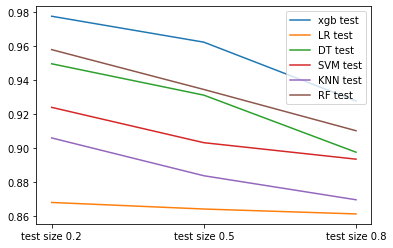

In [76]:
#xgb
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[0][0],test_acc_p2[0][0],test_acc_p3[0][0]],label='xgb test')
plt.errorbar('test size 0.2',train_acc_p1[0][1])
#plt.errorbar('test size 0.5',train_acc_p2[0][1])
#plt.errorbar('test size 0.8',train_acc_p3[0][1])
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[1][0],test_acc_p2[1][0],test_acc_p3[1][0]],label='LR test')
#plt.errorbar('test size 0.2',train_acc_p1[1][1])
#plt.errorbar('test size 0.5',train_acc_p2[1][1])
#plt.errorbar('test size 0.8',train_acc_p3[1][1])
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[2][0],test_acc_p2[2][0],test_acc_p3[2][0]],label='DT test')
#plt.errorbar('test size 0.2',train_acc_p1[2][0],xerr = 0,yerr = train_acc_p1[2][1])
#plt.errorbar('test size 0.5',train_acc_p2[2][1])
#plt.errorbar('test size 0.8',train_acc_p3[2][1])
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[3][0],test_acc_p2[3][0],test_acc_p3[3][0]],label='SVM test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[4][0],test_acc_p2[4][0],test_acc_p3[4][0]],label='KNN test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[5][0],test_acc_p2[5][0],test_acc_p3[5][0]],label='RF test')
plt.legend()
plt.show()

In [42]:
# Draw the heatmap of validation errors.
def draw_heatmap(training_errors, gamma_list, C_list, x_name, y_name, title):
    plt.figure(figsize = (5,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '%s'%(x_name), ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()


In [43]:
# Draw the heatmap of training errors.
def draw_heatmap1d(training_errors, gamma_list, y_name,title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     yticklabels=gamma_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set( ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()


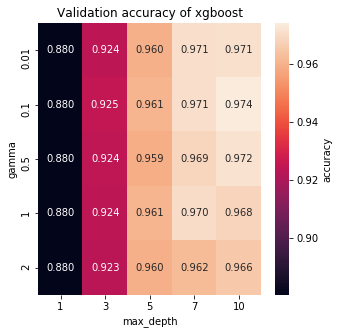

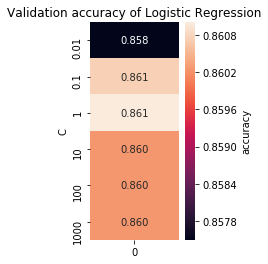

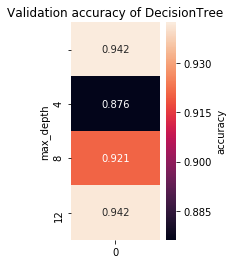

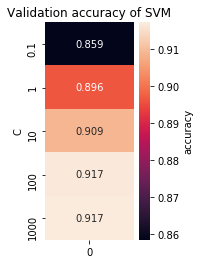

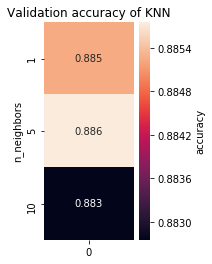

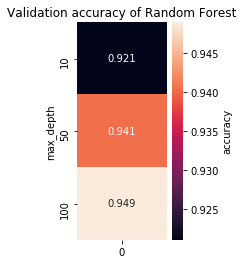

In [44]:
#Some examples of the heatmap
val_acc =np.reshape(results[0][0].cv_results_['mean_test_score'],(5,5))
draw_heatmap(val_acc,[1,3,5,7,10],[0.01,0.1,0.5,1,2],'max_depth','gamma','xgboost' )

val_acc =np.reshape(results[1][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.01,0.1,1,10,100,1000],'C','Logistic Regression')

val_acc =np.reshape(results[2][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[None,4,8,12],'max_depth','DecisionTree')

val_acc =np.reshape(results[3][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.1,1,10,100,1000],'C','SVM')

val_acc =np.reshape(results[4][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[1,5,10],'n_neighbors','KNN')

val_acc =np.reshape(results[5][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[10,50,100],'max_depth','Random Forest')

In [ ]:
#below is cv randomness

#load test data
name = ['intercolumnar distance','upper margin', 'lower margin' ,'exploitation', 'row number', 'modular ratio', 
        'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing','class_name']
data_test = pd.read_csv('avila_ts',header=None,names=name,nrows=5000)

#convert class to binary. loc is for labels, iloc is for num positions. Don't know why 'or' doesn't work here (never go to else)
for i in range(len(data_test)):
    if data_test.loc[i,'class_name']=='A':
        data_test.loc[i,'class_name']=0
    elif data_test.loc[i,'class_name']=='B':
        data_test.loc[i,'class_name']=0
    elif data_test.loc[i,'class_name']=='C':
        data_test.loc[i,'class_name']=0
    elif data_test.loc[i,'class_name']=='D':
        data_test.loc[i,'class_name']=0
    elif data_test.loc[i,'class_name']=='E':
        data_test.loc[i,'class_name']=0
    elif data_test.loc[i,'class_name']=='F':
        data_test.loc[i,'class_name']=0
    else:
        data_test.loc[i,'class_name']=1
        
data_test = data_test.values
np.random.shuffle(data_test)


((1000, 10), (1000,))


best = xgb.XGBClassifier(gamma = 0.1,max_depth=10)
xgb_loss = []
temp = []
count=0
for train in partition:        
    best_fit = best.fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('xgb',train_error_p1,val_acc_xgb_p1,test_error_p1))
final_result_p2.append(('xgb',train_error_p2,val_acc_xgb_p2,test_error_p2))
final_result_p3.append(('xgb',train_error_p3,val_acc_xgb_p3,test_error_p3))
#test error
    #train_error = temp[0][0]+temp[1][0]+temp[2][0]
    #val_error = temp[0][1]+temp[1][1]+temp[2][1]
    #test_error = temp[0][2]+temp[1][2]+temp[2][2]
    #xgb_best_fit_result.append((train_error,val_error,test_error))
#backup = X_test_one
#rescaled_X_test = scaler_one.fit_transform(X_test_one)
#rescaled_backup = scaler.fit(backup).transform(backup)
#pred = best_fit.predict(rescaled_X_test)
#pred = xgb_
#print(accuracy_score(Y_test_one,pred))
#print(classification_report(Y_test_one,pred))
#maybe try backup

best = LogisticRegression(C=0.1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('LR',train_error_p1,val_acc_LR_p1,test_error_p1))
final_result_p2.append(('LR',train_error_p2,val_acc_LR_p2,test_error_p2))
final_result_p3.append(('LR',train_error_p3,val_acc_LR_p3,test_error_p3))

best = DecisionTreeClassifier(max_depth=None)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('DT',train_error_p1,val_acc_DT_p1,test_error_p1))
final_result_p2.append(('DT',train_error_p2,val_acc_DT_p2,test_error_p2))
final_result_p3.append(('DT',train_error_p3,val_acc_DT_p3,test_error_p3))

best = SVC(C=100)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('SVM',train_error_p1,val_acc_SVM_p1,test_error_p1))
final_result_p2.append(('SVM',train_error_p2,val_acc_SVM_p2,test_error_p2))
final_result_p3.append(('SVM',train_error_p3,val_acc_SVM_p3,test_error_p3))

best = KNeighborsClassifier(n_neighbors=5)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('KNN',train_error_p1,val_acc_KNN_p1,test_error_p1))
final_result_p2.append(('KNN',train_error_p2,val_acc_KNN_p2,test_error_p2))
final_result_p3.append(('KNN',train_error_p3,val_acc_KNN_p3,test_error_p3))

best = RandomForestClassifier(max_depth=50)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('RF',train_error_p1,val_acc_RF_p1,test_error_p1))
final_result_p2.append(('RF',train_error_p2,val_acc_RF_p2,test_error_p2))
final_result_p3.append(('RF',train_error_p3,val_acc_RF_p3,test_error_p3))

In [26]:
final_result_p3
#table to display finalresult
#std?


[('xgb', 1.0, 0.925, 0.9325),
 ('LR', 0.859, 0.861, 0.8615),
 ('DT', 1.0, 0.891, 0.88475),
 ('SVM', 0.962, 0.88, 0.8895),
 ('KNN', 0.898, 0.86, 0.8695),
 ('RF', 0.994, 0.904, 0.90825)]

In [95]:
table_p1 = pd.DataFrame(np.array(final_result_p1),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p2 = pd.DataFrame(np.array(final_result_p2),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p3 = pd.DataFrame(np.array(final_result_p3),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p1

#make a line graph: x-partitions, y-accuracy, color-classifiers

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.9732499999999998,0.983
1,LR,0.8664999999999999,0.8657499999999999,0.851
2,DT,1.0,0.9371666666666666,0.9486666666666667
3,SVM,0.9562500000000002,0.9205,0.9170000000000001
4,KNN,0.9330000000000002,0.89875,0.883
5,RF,0.9970833333333333,0.9514999999999999,0.9460000000000001


In [96]:
table_p2

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.9488,0.9664
1,LR,0.864,0.862,0.8652000000000001
2,DT,1.0,0.8933333333333332,0.9258666666666667
3,SVM,0.9540000000000001,0.9044,0.9128
4,KNN,0.928,0.8884,0.8968000000000002
5,RF,0.9945333333333334,0.9264000000000001,0.9357333333333333


In [97]:
table_p3

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.9209999999999999,0.93275
1,LR,0.8649999999999999,0.866,0.8610000000000001
2,DT,1.0,0.8823333333333334,0.8840833333333333
3,SVM,0.9579999999999999,0.8930000000000001,0.8922500000000001
4,KNN,0.916,0.88,0.8735
5,RF,0.9923333333333333,0.911,0.9119999999999999


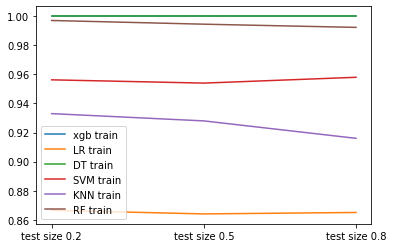

In [98]:
#xgb
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][1],final_result_p2[0][1],final_result_p3[0][1]],label='xgb train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][1],final_result_p2[1][1],final_result_p3[1][1]],label='LR train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][1],final_result_p2[2][1],final_result_p3[2][1]],label='DT train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][1],final_result_p2[3][1],final_result_p3[3][1]],label='SVM train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][1],final_result_p2[4][1],final_result_p3[4][1]],label='KNN train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][1],final_result_p2[5][1],final_result_p3[5][1]],label='RF train')
plt.legend()
plt.show()

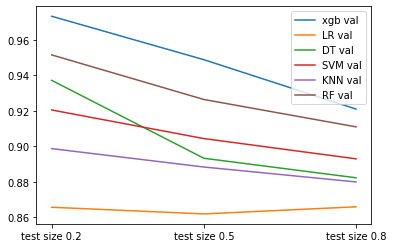

In [99]:
#plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][2],final_result_p2[0][2],final_result_p3[0][2]],label='xgb val')
#plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][3],final_result_p2[0][3],final_result_p3[0][3]],label='xgb test')
#xgb
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][2],final_result_p2[0][2],final_result_p3[0][2]],label='xgb val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][2],final_result_p2[1][2],final_result_p3[1][2]],label='LR val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][2],final_result_p2[2][2],final_result_p3[2][2]],label='DT val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][2],final_result_p2[3][2],final_result_p3[3][2]],label='SVM val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][2],final_result_p2[4][2],final_result_p3[4][2]],label='KNN val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][2],final_result_p2[5][2],final_result_p3[5][2]],label='RF val')
plt.legend()
plt.show()

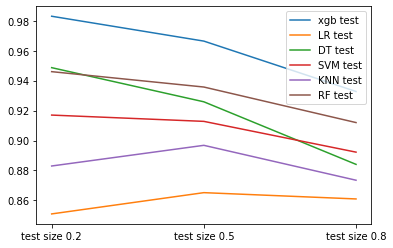

In [100]:

plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][3],final_result_p2[0][3],final_result_p3[0][3]],label='xgb test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][3],final_result_p2[1][3],final_result_p3[1][3]],label='LR test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][3],final_result_p2[2][3],final_result_p3[2][3]],label='DT test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][3],final_result_p2[3][3],final_result_p3[3][3]],label='SVM test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][3],final_result_p2[4][3],final_result_p3[4][3]],label='KNN test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][3],final_result_p2[5][3],final_result_p3[5][3]],label='RF test')
plt.legend()
plt.show()

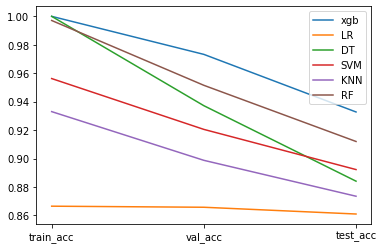

In [101]:
#xgb
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[0][1],final_result_p1[0][2],final_result_p3[0][3]],label='xgb')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[1][1],final_result_p1[1][2],final_result_p3[1][3]],label='LR')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[2][1],final_result_p1[2][2],final_result_p3[2][3]],label='DT')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[3][1],final_result_p1[3][2],final_result_p3[3][3]],label='SVM')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[4][1],final_result_p1[4][2],final_result_p3[4][3]],label='KNN')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[5][1],final_result_p1[5][2],final_result_p3[5][3]],label='RF')
plt.legend()
plt.show()

In [58]:
# Load dataset
#file2 = 'magic04.data'
#header2 = ['fLength','fWidth','fSize','fConc','fConc1','fAsym', 'fM3Long','fM3Trans','fAlpha','fDist','label']
#dataset2=pd.read_csv(file,header = None,names=header2,nrows = 5000)
#dataset2.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [ ]:
# Load dataset
#file = 'winequality-red'
#header = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','yearly income']
#dataset=pd.read_csv(file,nrows = 5000)
#dataset.head()